# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Importing Data from mounted Google Drive

In [2]:
train = pd.read_csv("/content/drive/MyDrive/archive (2)/train.csv")
test = pd.read_csv("/content/drive/MyDrive/archive (2)/test.csv")

In [3]:
train

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,SD2,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,199.061782,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,114.634458,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,118.939253,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,127.318597,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,87.718281,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2,no stress
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369284,721.396910,721.533965,36.377559,9.609941,9.609936,3.785409,83.384647,0.933333,0.000000,6.797519,50.994582,1.007321,0.075965,0.000015,0.000083,0.013352,0.008732,0.008732,1.529068,1.007321,0.075965,298.009244,45.893349,313.115284,48.219676,89.119683,38.227175,5.886975,10.880317,649.351702,8.190908,0.122087,2.096850,1.314910,2,no stress
369285,984.266492,978.622945,74.918433,13.762274,13.761705,5.443754,61.314243,6.333333,0.200000,9.734243,105.502548,0.248964,0.167716,-0.000110,0.000046,0.014014,0.006317,0.006317,2.218313,0.248964,0.167716,1558.597883,68.405858,717.285030,31.481178,99.642453,2.573834,0.112964,0.357547,2278.456746,278.683532,0.003588,2.131264,1.175975,2,no stress
369286,1025.499743,1024.968400,95.309200,23.051254,23.050395,4.134664,59.028594,30.400000,2.066667,16.304530,133.797793,-0.429686,-0.075321,-0.000216,-0.002236,0.022705,0.009494,0.009494,2.391601,-0.429686,-0.075321,1950.393956,45.030641,2376.578392,54.870376,99.819930,4.287216,0.098983,0.180070,4331.259564,554.340761,0.001804,2.215643,1.140232,2,no stress
369287,798.123167,803.559610,78.449897,16.736686,16.736657,4.687302,75.978628,10.000000,1.466667,11.838553,110.311474,0.600389,-0.634762,0.000024,-0.001354,0.021549,0.011376,0.011376,1.894304,0.600389,-0.634762,1606.291482,54.821185,1277.128490,43.587168,96.477005,46.636158,1.591647,3.522995,2930.056129,27.384942,0.036516,2.091628,1.181937,2,no stress


In [4]:
test

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,SD2,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,721.901897,727.267280,74.722315,12.361264,12.361069,6.044877,84.121868,4.933333,0.000000,8.743513,105.310967,1.262958,-0.703779,0.000081,-0.000951,0.017605,0.011208,0.011208,1.570800,1.262958,-0.703779,1016.073759,59.818117,615.914573,36.260015,90.239711,66.617057,3.921868,9.760289,1698.605390,9.245599,0.108160,2.097342,1.243696,2,no stress
1,843.538633,844.407930,58.499429,19.298880,19.298795,3.031234,71.478642,21.000000,0.200000,13.650863,81.596693,-0.445806,-0.144911,0.000061,-0.001543,0.022969,0.011970,0.011970,1.918953,-0.445806,-0.144911,765.518473,32.452560,1566.866135,66.424024,98.336849,26.500086,1.123416,1.663151,2358.884694,59.126832,0.016913,2.217275,1.250056,2,time pressure
2,958.523868,966.671125,132.849110,21.342715,21.342653,6.224565,63.874293,24.133333,1.800000,15.096571,187.269500,-0.666523,-0.103725,-0.000055,-0.002000,0.022079,0.009606,0.009606,2.298473,-0.666523,-0.103725,2237.739905,51.696218,2074.868884,47.933575,99.233584,16.024935,0.370208,0.766416,4328.633724,129.477524,0.007723,2.217136,1.144943,2,no stress
3,824.838669,842.485905,117.822094,11.771814,11.771248,10.008830,74.330531,4.733333,0.533333,8.326307,166.417439,-0.698096,-0.145092,0.000130,0.000445,0.014920,0.007051,0.007051,2.116033,-0.698096,-0.145092,2330.980957,81.661325,505.886664,17.722743,96.641348,17.581470,0.615932,3.358652,2854.449091,28.773854,0.034754,2.106863,1.142355,2,no stress
4,756.707933,747.941620,143.968457,13.357748,13.356388,10.777899,82.092049,5.933333,0.666667,9.447545,203.382835,1.134111,0.769517,0.000310,-0.000170,0.019649,0.011689,0.011689,1.681034,1.134111,0.769517,4750.624447,89.465158,524.203971,9.871963,93.707747,35.199054,0.662879,6.292253,5310.027472,14.892559,0.067148,1.912191,1.128098,2,interruption
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41028,1118.406543,1117.857050,113.955632,18.592177,18.592071,6.129225,54.234182,18.800000,0.266667,13.150967,160.620124,0.039637,-0.168160,0.000053,-0.000785,0.017038,0.005512,0.005512,3.091047,0.039637,-0.168160,4130.820437,80.985074,969.550262,19.008113,99.964170,0.347514,0.006813,0.035830,5100.718213,2789.962965,0.000358,2.183460,1.082927,2,time pressure
41029,855.991173,765.221410,296.763366,20.623727,20.610745,14.389415,76.416971,15.733333,3.533333,14.578861,419.433484,3.644498,1.866897,0.000736,0.000847,0.028135,0.016151,0.016151,1.742060,3.644498,1.866897,7163.989622,83.960222,1250.595884,14.656681,91.377081,118.014128,1.383097,8.622919,8532.599635,10.597001,0.094366,1.695327,1.154370,2,interruption
41030,689.388662,663.192770,133.815714,21.699038,21.696138,6.166896,90.254005,13.933333,4.000000,15.346606,188.620710,0.885293,0.689171,-0.000329,0.000709,0.032607,0.019102,0.019102,1.706976,0.885293,0.689171,3946.374071,64.968893,1911.676588,31.471804,89.839595,216.200973,3.559302,10.160405,6074.251632,8.842128,0.113095,2.078000,1.214869,2,no stress
41031,761.421571,761.064590,60.792671,11.280586,11.280573,5.389141,79.313782,2.733333,0.266667,7.979232,85.602742,0.005286,-0.040367,-0.000021,-0.000300,0.015049,0.008822,0.008822,1.705789,0.005286,-0.040367,732.516968,54.756129,563.466628,42.119504,93.094387,41.797177,3.124367,6.905613,1337.780773,13.480973,0.074179,2.191379,1.234546,2,no stress


In [5]:
train['condition'].unique()

array(['no stress', 'interruption', 'time pressure'], dtype=object)

<BarContainer object of 3 artists>

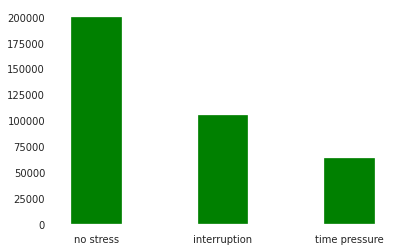

In [6]:
conditions = dict(train['condition'].value_counts())
labels = list(conditions.keys())
counts = list(conditions.values())
plt.bar(labels,counts, color ='green',
        width = 0.4)

# Encoding classification labels in "Condition" columns

In [7]:
le = preprocessing.LabelEncoder()
le.fit(train['condition'])
train['condition'] = le.transform(train['condition'])
test['condition'] = le.transform(test['condition'])

# Analysing Data using Pandas Profiling

In [8]:
profile = pp.ProfileReport(train)
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/48 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Plotting Pearson's Correlation Matrix to check dependency of variables

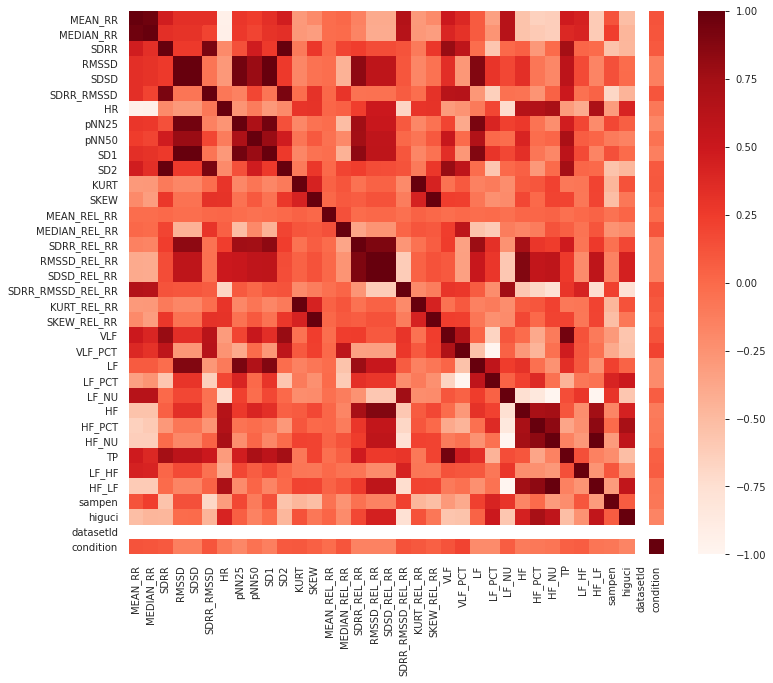

In [9]:
plt.figure(figsize=(12,10))
corr = train.corr()
sns.heatmap(corr, annot=False, cmap=plt.cm.Reds)
plt.show()

# Defining a feature selection function 

This function selects features which has a positive pearson's correlation with "condition" column of data. A suitable threshold is set for selcting such features.

In [10]:
def feature_selection(correlation,threshold):
    selected_features = []
    for i in range(corr.shape[0]):
      if corr.iloc[i,35] > threshold:
        selected_features.append(train.iloc[:,i])
    return pd.DataFrame(selected_features).T

In [11]:
CORRELATION_THRESHOLD = 0.1
reduced_train = feature_selection(corr,CORRELATION_THRESHOLD)

In [12]:
reduced_train

,MEAN_RR,MEDIAN_RR,SDRR_RMSSD,MEDIAN_REL_RR,SDRR_RMSSD_REL_RR,VLF,VLF_PCT,condition
0,885.157845,853.763730,9.063146,-0.000179,2.143342,2661.894136,72.203287,1.0
1,939.425371,948.357865,6.272369,0.000611,2.930855,2314.265450,76.975728,0.0
2,898.186047,907.006860,5.182201,-0.000263,2.127053,1373.887112,51.152225,0.0
3,881.757865,893.460030,5.748591,0.000494,2.050988,2410.357408,70.180308,1.0
4,809.625331,811.184865,3.266724,-0.002736,1.816544,1151.177330,43.918366,1.0
...,...,...,...,...,...,...,...,...
369284,721.396910,721.533965,3.785409,0.000083,1.529068,298.009244,45.893349,1.0
369285,984.266492,978.622945,5.443754,0.000046,2.218313,1558.597883,68.405858,1.0
369286,1025.499743,1024.968400,4.134664,-0.002236,2.391601,1950.393956,45.030641,1.0
369287,798.123167,803.559610,4.687302,-0.001354,1.894304,1606.291482,54.821185,1.0


# Plotting some of the extracted features

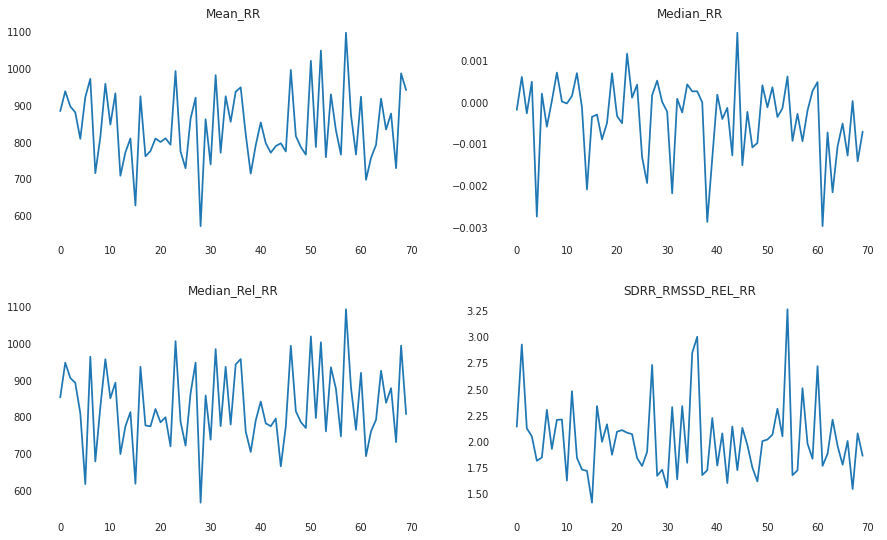

In [13]:
fig, axarr = plt.subplots(2, 2, figsize=(15, 9))
reduced_train['MEAN_RR'][:70].plot(ax=axarr[0][0])
reduced_train['MEDIAN_RR'][:70].plot(ax=axarr[1][0])
reduced_train['MEDIAN_REL_RR'][:70].plot(ax=axarr[0][1])
reduced_train['SDRR_RMSSD_REL_RR'][:70].plot(ax=axarr[1][1])
axarr[0][0].set_title("Mean_RR")
axarr[0][1].set_title("Median_RR")
axarr[1][0].set_title("Median_Rel_RR")
axarr[1][1].set_title("SDRR_RMSSD_REL_RR")
plt.subplots_adjust(hspace=.3)

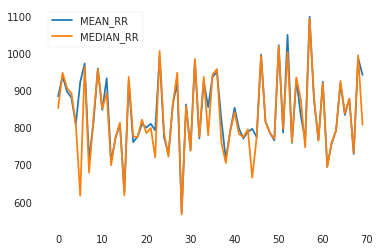

In [14]:
reduced_train[['MEAN_RR','MEDIAN_RR']][:70].plot()

# Splitting data into features and respective labels

In [15]:
X_train = reduced_train.iloc[:,:-1]
y_train = reduced_train.iloc[:,-1]

In [16]:
X_test = test[X_train.columns]
y_test = test['condition']

In [17]:
X_train.head()

,MEAN_RR,MEDIAN_RR,SDRR_RMSSD,MEDIAN_REL_RR,SDRR_RMSSD_REL_RR,VLF,VLF_PCT
0,885.157845,853.763730,9.063146,-0.000179,2.143342,2661.894136,72.203287
1,939.425371,948.357865,6.272369,0.000611,2.930855,2314.265450,76.975728
2,898.186047,907.006860,5.182201,-0.000263,2.127053,1373.887112,51.152225
3,881.757865,893.460030,5.748591,0.000494,2.050988,2410.357408,70.180308
4,809.625331,811.184865,3.266724,-0.002736,1.816544,1151.177330,43.918366


In [18]:
X_test.head()

,MEAN_RR,MEDIAN_RR,SDRR_RMSSD,MEDIAN_REL_RR,SDRR_RMSSD_REL_RR,VLF,VLF_PCT
0,721.901897,727.267280,6.044877,-0.000951,1.570800,1016.073759,59.818117
1,843.538633,844.407930,3.031234,-0.001543,1.918953,765.518473,32.452560
2,958.523868,966.671125,6.224565,-0.002000,2.298473,2237.739905,51.696218
3,824.838669,842.485905,10.008830,0.000445,2.116033,2330.980957,81.661325
4,756.707933,747.941620,10.777899,-0.000170,1.681034,4750.624447,89.465158


# Defining a "Random Forest" model and training it.

In [19]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
y_pred = model.predict(X_test)

In [21]:
y_pred[:20]

array([1., 2., 1., 1., 0., 2., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 0.])

# Printing the model performance and classification report.


In [22]:
accuracy_score(y_test,y_pred)

1.0

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       1.00      1.00      1.00     22158
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033

